# Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

C:\Users\Pakanun\anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
col_names = df.columns

col_names

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
df_clean = imp_mean.fit_transform(df)

In [9]:
df_clean = pd.DataFrame(df_clean,columns = df.columns)

In [10]:
df_clean.describe().style.background_gradient(cmap = "Reds")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df_clean.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

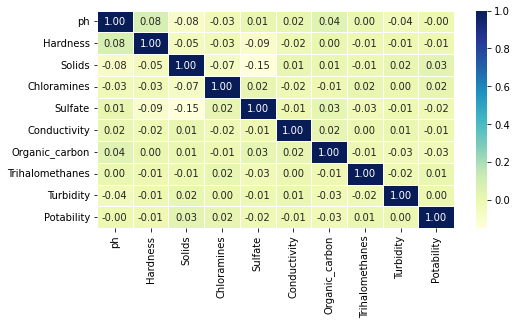

In [12]:
corr_mat = df_clean.corr()
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.heatmap(corr_mat,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

In [13]:
X = df_clean.drop('Potability',axis = 1)
y = df_clean.Potability

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [15]:
X_train.shape, X_test.shape

((2194, 9), (1082, 9))

In [16]:
cols = X_train.columns

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [19]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.012082,-1.175513,2.580978,-1.921683,-2.390089,-0.327969,0.552055,-0.818736,0.198449
1,0.713614,-0.436925,-1.284570,-0.316328,0.003349,0.012385,-0.169397,0.713352,-1.776681
2,-1.176210,-0.342165,1.550377,1.604138,0.271749,-0.967573,-0.082491,-0.004673,-0.418262
3,0.298567,0.763120,-0.819829,-0.257413,0.905394,1.922443,1.053663,-0.428316,0.326390
4,-0.327991,-0.991149,-0.937589,-0.747106,0.003349,-1.364133,-0.668419,-0.315410,-0.202471


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [21]:
NN = MLPClassifier(hidden_layer_sizes=(7,6),
                  activation='relu',
                  solver='adam',
                  max_iter=1000,
                  random_state=42)
NN.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(7, 6), max_iter=1000, random_state=42)

In [22]:
print("Score: ", NN.score(X_test , y_test), '\n')

print("Weight: ")
print(*NN.coefs_, sep='\n')

print()
print('bias: ')
print(*NN.intercepts_,sep='\n')

Score:  0.6894639556377079 

Weight: 
[[-4.58377556e-01  7.50687092e-01  5.36556996e-01  7.08260308e-01
  -5.94699622e-01 -5.12232894e-01 -8.45382598e-01]
 [ 3.71837530e-01 -1.77019086e-01  5.43236697e-01 -6.30608108e-01
   8.01837196e-01  2.24199645e-01 -7.10429435e-01]
 [-5.14568690e-01 -6.76319383e-01 -8.37023300e-02  4.29443145e-01
  -3.11733982e-01 -1.60552564e-01  7.11499414e-01]
 [-4.08952529e-01 -3.94362938e-01 -4.01050952e-01  1.43515867e-01
   3.24304057e-01 -2.44696418e-01  1.79753861e-01]
 [ 9.41956888e-01 -4.45156894e-02  3.45504263e-01 -8.24093997e-01
  -2.85021702e-01  5.73507794e-01  1.63566845e-01]
 [ 2.97723512e-01  2.39298061e-01 -3.07790320e-01 -4.15435373e-02
  -9.36376537e-02 -5.22338764e-01  9.92604410e-02]
 [-1.15416110e-01  4.42190976e-01 -5.21533702e-01 -1.14934189e-01
  -1.07446905e-02 -1.82012748e-02  1.46979716e-01]
 [ 2.13702833e-01  3.12833619e-01  5.08852016e-02  1.49044981e-01
   3.00745238e-01 -1.89347871e-01  5.25322692e-02]
 [-1.24563469e-01 -5.63045

In [23]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [24]:
from datetime import datetime
start_time = datetime.now()
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression() , MLPClassifier() , DecisionTreeClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time), '\n')
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78       680
         1.0       0.64      0.33      0.44       402

    accuracy                           0.68      1082
   macro avg       0.67      0.61      0.61      1082
weighted avg       0.67      0.68      0.65      1082

Duration: 0:00:00.950564 

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73       680
         1.0       0.51      0.41      0.45       402

    accuracy                           0.64      1082
   macro avg       0.60      0.59      0.59      1082
weighted avg       0.62      0.64      0.63      1082

Duration: 0:00:01.067444 

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79       680
         1.0       0.68      0.30      0.4

C:\Users\Pakanun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
import statistics

data1 = [0.7157, 0.7150, 0.7083, 0.7299, 0.7179]
 
mean = statistics.mean(data1)
SD = statistics.stdev(data1)
 
print("Mean is :", mean)
print("SD is :", SD)

Mean is : 0.71736
SD is : 0.007873245836375223


# MLP

## 1. Prepare the environment

In [26]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1650 Ti (UUID: GPU-6a814758-74aa-8da0-74cd-0efe37da8dd7)


In [27]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]

NumPy 1.23.1

TensorFlow 2.9.1
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [28]:
# Set fixed seeding values for reproducability during experiments
# Skip this cell if random initialization (with varied results) is needed
tf.random.set_seed(0)

# 2. Prepare the data in NumPy 

In [29]:
import pandas as pd

df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [30]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [31]:
df = df.fillna(df.mean())

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop(['Potability'], axis=1)
y = df['Potability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
print( f"x_train.shape={x_train.shape} , x_train.dtype={x_train.dtype} , min(x_train)={np.min(x_train)} , max(x_train)={np.max(x_train)}" )
print( f"y_train.shape={y_train.shape} , y_train.dtype={y_train.dtype} , min(y_train)={np.min(y_train)} , max(y_train)={np.max(y_train)}" )
print( f"x_test.shape={x_test.shape} , x_test.dtype={x_test.dtype} , min(x_test)={np.min(x_test)} , max(x_test)={np.max(x_test)}" )
print( f"y_test.shape={y_test.shape} , y_test.dtype={y_test.dtype} , min(y_test)={np.min(y_test)} , max(y_test)={np.max(y_test)}" )

x_train.shape=(2194, 9) , x_train.dtype=float64 , min(x_train)=-5.656491173707195 , max(x_train)=4.712951610472038
y_train.shape=(2194,) , y_train.dtype=int64 , min(y_train)=0 , max(y_train)=1
x_test.shape=(1082, 9) , x_test.dtype=float64 , min(x_test)=-4.55294343038086 , max(x_test)=4.399670653361734
y_test.shape=(1082,) , y_test.dtype=int64 , min(y_test)=0 , max(y_test)=1


In [34]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print( f"x_train.shape={x_train.shape} , x_train.dtype={x_train.dtype} , min(x_train)={np.min(x_train)} , max(x_train)={np.max(x_train)}" )
print( f"x_test.shape={x_test.shape} , x_test.dtype={x_test.dtype} , min(x_test)={np.min(x_test)} , max(x_test)={np.max(x_test)}" )

x_train.shape=(2194, 9) , x_train.dtype=float32 , min(x_train)=-5.656491279602051 , max(x_train)=4.71295166015625
x_test.shape=(1082, 9) , x_test.dtype=float32 , min(x_test)=-4.552943229675293 , max(x_test)=4.399670600891113


# 3. Create the network architecture

In [35]:
input_dim = 9     # the number of features per one input
output_dim = 2     # the number of output classes

model = tf.keras.models.Sequential()

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                320       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 6

# 4. Compile the model

In [36]:
# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )

In [37]:
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

In [38]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                              save_weights_only=True,
                                                                                              monitor='val_acc',
                                                                                              mode='max',
                                                                                              save_best_only=True)

In [39]:
history = model.fit ( x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback] )

Epoch 1/20
14/14 [==============================] - 5s 47ms/step - loss: 1.1081 - acc: 0.4387 - val_loss: 0.6924 - val_acc: 0.5353
Epoch 2/20
14/14 [==============================] - 0s 20ms/step - loss: 0.8099 - acc: 0.5060 - val_loss: 0.6756 - val_acc: 0.6059
Epoch 3/20
14/14 [==============================] - 0s 20ms/step - loss: 0.7213 - acc: 0.5715 - val_loss: 0.6675 - val_acc: 0.6105
Epoch 4/20
14/14 [==============================] - 0s 19ms/step - loss: 0.6837 - acc: 0.6074 - val_loss: 0.6618 - val_acc: 0.6219
Epoch 5/20
14/14 [==============================] - 0s 20ms/step - loss: 0.6639 - acc: 0.6199 - val_loss: 0.6583 - val_acc: 0.6355
Epoch 6/20
14/14 [==============================] - 0s 23ms/step - loss: 0.6387 - acc: 0.6484 - val_loss: 0.6549 - val_acc: 0.6378
Epoch 7/20
14/14 [==============================] - 0s 17ms/step - loss: 0.6389 - acc: 0.6348 - val_loss: 0.6499 - val_acc: 0.6492
Epoch 8/20
14/14 [==============================] - 0s 15ms/step - loss: 0.6244 - a

In [40]:
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
# Check the keys in 'history'
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

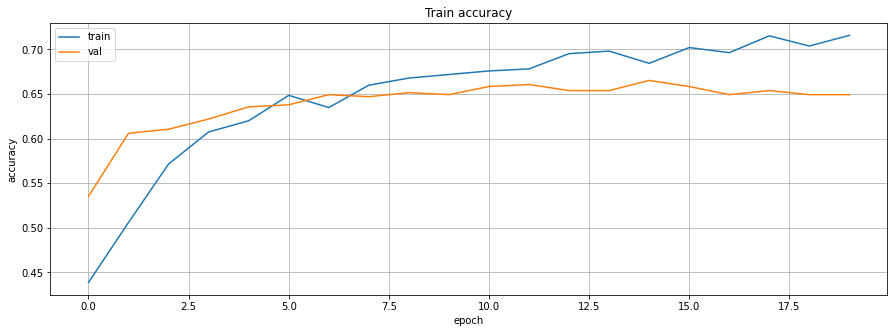

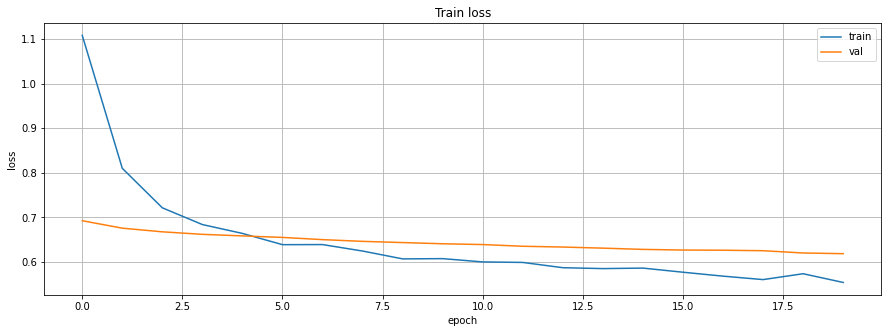

In [42]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

# 6. Evaluate the model on test set


In [43]:
results = model.evaluate(x_test, y_test, batch_size=128)
print( f"{model.metrics_names} = {results}" )

9/9 [==============================] - 0s 7ms/step - loss: 0.6170 - acc: 0.6608
['loss', 'acc'] = [0.6170473694801331, 0.6608133316040039]


# 7. Inference

In [44]:
# Test using the model on x_test[i]
i = 0
y_pred = model.predict( x_test[i].reshape(1,-1) )   # reshape x_test[i] from (n_feature,) to (1, n_feature)

print( f"{'#'*10} Input: x_test[{i}] {'#'*10}" )
print( f"shape={x_test[i].shape}\nvalue={x_test[i]}\n" )

print( f"{'#'*10} Ground truth: y_test[{i}] {'#'*10}" )
print( f"shape={y_test[i].shape}\nvalue={y_test[i]}\n" )

print( f"{'#'*10} Prediction: y_pred {'#'*10}" )
print( f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}" )
print( f"value={y_pred}" )
print( f"np.argmax(y_pred)={np.argmax(y_pred)}" )

1/1 [==============================] - 0s 179ms/step
########## Input: x_test[0] ##########
shape=(9,)
value=[-0.01208204 -0.4037331  -0.19011497  0.14159842 -0.0147908  -0.8597023
  1.7995746   0.03469764  1.1985697 ]

########## Ground truth: y_test[0] ##########
shape=()
value=0

########## Prediction: y_pred ##########
type=<class 'numpy.ndarray'>
dtype=float32
shape=(1, 2)
value=[[0.70859396 0.29140604]]
np.argmax(y_pred)=0
